In [1]:
import pandas as pd
df = pd.read_csv('flight_details.csv')

In [2]:
df

,Airline,Flight,Source_City,Departure_Time,Stops,Arrival_Time,Destination_City,Class,Duration_(hours),Days_Left,Price
0,Frontier Airlines,F9886,Philadelphia,Night,Non-stop,Morning,Dallas,Economy,11.3,24,546.57
1,WestJet,WS3895,Dallas,Night,Non-stop,Early Morning,Philadelphia,Business,10.7,9,257.20
2,Delta Airlines,DL4153,Miami,Night,2 Stops,Afternoon,Vancouver,Economy,3.7,6,180.08
3,WestJet,WS8701,Portland,Evening,2 Stops,Night,Toronto,Economy,3.3,29,344.76
4,Alaska Airlines,AS4093,Dallas,Night,Non-stop,Afternoon,Portland,Economy,2.5,22,552.83
...,...,...,...,...,...,...,...,...,...,...,...
199995,Allegiant Air,G49060,Dallas,Night,Non-stop,Evening,Vancouver,Business,1.8,13,204.59
199996,Hawaiian Airlines,HA6382,Montreal,Evening,1 Stop,Evening,New York,Economy,1.1,23,497.80
199997,Delta Airlines,DL4865,Vancouver,Night,Non-stop,Evening,Salt Lake City,Economy,10.2,15,100.71
199998,Air Canada,AC7758,Dallas,Evening,1 Stop,Morning,Portland,Economy,2.2,6,890.57


In [3]:
df.Airline.value_counts()


Airline
Frontier Airlines     16841
Southwest Airlines    16761
American Airlines     16734
Alaska Airlines       16705
Air Canada            16678
Delta Airlines        16657
Allegiant Air         16651
WestJet               16643
JetBlue               16638
Spirit Airlines       16622
United Airlines       16539
Hawaiian Airlines     16531
Name: count, dtype: int64

In [4]:
df.Source_City.value_counts()

Source_City
Montreal          20049
New York          10159
Philadelphia      10152
Atlanta           10086
Orlando           10070
Seattle           10056
Houston           10047
Las Vegas         10043
Toronto           10030
Dallas            10016
Salt Lake City    10000
Miami              9983
Boston             9960
Chicago            9946
San Diego          9943
Calgary            9912
San Francisco      9910
Vancouver          9860
Portland           9778
Name: count, dtype: int64

In [5]:
df.Destination_City.value_counts()

Destination_City
Montreal          19970
Atlanta           10216
New York          10120
Houston           10076
Las Vegas         10068
Salt Lake City    10061
San Diego         10045
San Francisco     10036
Portland          10030
Toronto           10020
Philadelphia      10008
Dallas             9999
Seattle            9995
Boston             9985
Vancouver          9954
Chicago            9922
Calgary            9921
Miami              9844
Orlando            9730
Name: count, dtype: int64

In [6]:
df.Departure_Time.value_counts()

Departure_Time
Night            40159
Afternoon        40053
Early Morning    39978
Evening          39948
Morning          39862
Name: count, dtype: int64

In [7]:
df.Arrival_Time.value_counts()

Arrival_Time
Morning          40188
Afternoon        40111
Night            40027
Early Morning    39854
Evening          39820
Name: count, dtype: int64

In [8]:
df.Stops.value_counts()

Stops
2 Stops     66686
Non-stop    66669
1 Stop      66645
Name: count, dtype: int64

In [9]:
df.Class.value_counts()

Class
Economy     159879
Business     40121
Name: count, dtype: int64

In [10]:
df['Duration_(hours)'].min()

np.float64(1.0)

In [11]:
df['Duration_(hours)'].max()

np.float64(12.0)

In [12]:
df['Duration_(hours)'].median()

np.float64(6.5)

# Preprocessing


In [13]:
df = df.drop('Flight', axis=1)
df['Class'] = df['Class'].apply(lambda x: 1 if x== 'Business' else 0)
df['Stops'] = df['Stops'].apply(lambda x: 2 if x == '2 Stops' else (1 if x == '1 Stop' else 0))



In [14]:
df = df.join(pd.get_dummies(df.Airline, prefix='airline')).drop('Airline', axis=1)
df = df.join(pd.get_dummies(df.Source_City, prefix='source')).drop('Source_City', axis=1)
df = df.join(pd.get_dummies(df.Destination_City, prefix='dest')).drop('Destination_City', axis=1)
df = df.join(pd.get_dummies(df.Arrival_Time, prefix='arrival')).drop('Arrival_Time', axis=1)
df = df.join(pd.get_dummies(df.Departure_Time, prefix='departure')).drop('Departure_Time', axis=1)

# Convert any boolean columns to binary (0 or 1)
df = df.astype(int)


In [15]:
df

,Stops,Class,Duration_(hours),Days_Left,Price,airline_Air Canada,airline_Alaska Airlines,airline_Allegiant Air,airline_American Airlines,airline_Delta Airlines,...,arrival_Afternoon,arrival_Early Morning,arrival_Evening,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early Morning,departure_Evening,departure_Morning,departure_Night
0,0,0,11,24,546,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,10,9,257,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2,0,3,6,180,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,2,0,3,29,344,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,2,22,552,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,1,1,13,204,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
199996,1,0,1,23,497,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
199997,0,0,10,15,100,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
199998,1,0,2,6,890,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


# Training regression model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('Price', axis = 1), df.Price

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
reg = RandomForestRegressor(n_jobs=-1)
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [19]:
reg.score(X_test, y_test)

-0.03746171069638038

In [20]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  -0.03746171069638038
MAE:  227.96236892288357
MSE:  69982.73816506665
RMSE:  264.5425072933774


Text(0.5, 1.0, 'Predicted vs Actual Flight Price')

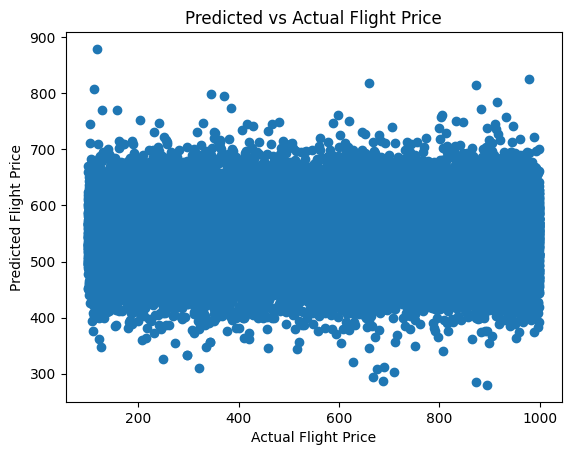

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted vs Actual Flight Price')

In [22]:
df.Price.describe()

count    200000.000000
mean        549.364675
std         259.981286
min         100.000000
25%         324.000000
50%         549.000000
75%         774.000000
max         999.000000
Name: Price, dtype: float64

In [23]:
important_features_dict = {}

for idx, val in enumerate(reg.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key = important_features_dict.get,
                                 reverse = True)

print(f'5 most important features: {important_features_list[:5]}')

5 most important features: [3, 2, 0, 1, 63]


In [24]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('Days_Left', np.float64(0.13783221890093997)),
 ('Duration_(hours)', np.float64(0.09712135667415209)),
 ('Stops', np.float64(0.040731029335817605)),
 ('Class', np.float64(0.021535757775224432)),
 ('departure_Night', np.float64(0.01626953650123157)),
 ('arrival_Afternoon', np.float64(0.016196514843845336)),
 ('arrival_Early Morning', np.float64(0.015875798511868464)),
 ('arrival_Morning', np.float64(0.015850957126855737)),
 ('arrival_Night', np.float64(0.01573397755925647)),
 ('departure_Evening', np.float64(0.015594005589542761)),
 ('departure_Afternoon', np.float64(0.015582760096341202)),
 ('departure_Early Morning', np.float64(0.015456102074873235)),
 ('source_Montreal', np.float64(0.015283799989705239)),
 ('arrival_Evening', np.float64(0.015141389527294928)),
 ('dest_Montreal', np.float64(0.014079054566801068)),
 ('departure_Morning', np.float64(0.014076624299474374)),
 ('airline_United Airlines', np.float64(0.012796389870542775)),
 ('airline_Frontier Airlines', np.float64(0.01270

In [25]:
df.Days_Left.describe()

count    200000.000000
mean         15.522050
std           8.644323
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          30.000000
Name: Days_Left, dtype: float64

<BarContainer object of 5 artists>

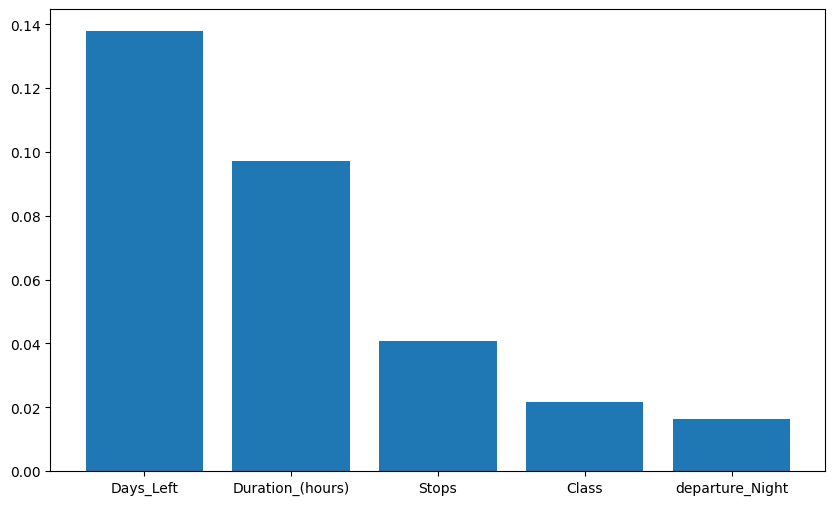

In [26]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2], 
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11), 
    'min_samples_leaf': randint(1, 5),
    'max_features': [1.0, 'auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg,param_distributions=param_dist, n_iter=2, cv=3,
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ryana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-package

In [29]:
best_regressor.score(X_test, y_test)

-0.019030251584381652

In [30]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = best_regressor.predict(X_test)

print('R2: ', r2_score(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_pred)))

R2:  -0.019030251584381652
MAE:  226.60085265835144
MSE:  68739.43061575062
RMSE:  262.1820562428913


Text(0.5, 1.0, 'Predicted vs Actual Flight Price')

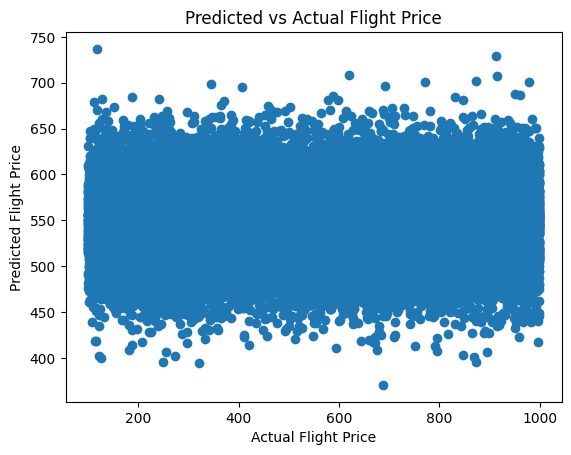

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted vs Actual Flight Price')